In [ ]:
The front office has brought in catcher f06c9fdf this offseason. 
Using the data provided, please prepare a report for a coaching staff audience to 
brief them on the player’s current strengths and weaknesses as a pitch receiver. 
The report (explanations and any visuals) should be less than two pages long. 
Please also submit the code used to generate the brief, though your process here is 
less important than the way you communicate your finding in the report.


In [189]:
import csv 
import pandas as pd 
import numpy as np
import collections

import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')

pd.set_option('display.max_columns', None)

<Figure size 1120x960 with 0 Axes>

In [ ]:
vert: 1.5-3.5 ft
horz: .7083333 ft

https://www.baseballprospectus.com/news/article/14098/spinning-yarn-the-real-strike-zone-part-2/#:~:targetText=Most%20batters'%20strike%20zone%20boundaries,the%20front%20of%20home%20plate.

In [2]:
#dftrain = pd.read_csv('2020-train.csv')
df = pd.read_csv('2020-train.csv')
df

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
0,d7e3acce,Right,32678d8d,Right,a4833794,f88d09f4,83cdf9ff,3,1,0.0,0,1,93.008102,-1.990750,-0.364950,1995.780029,-150.653000,1:00,5.97789,0.221744,6.45304,-12.477000,18.268900,9.389410,3.050340,0.555689,86.024200,-4.37258,1.429580,0.404622,-0.059343,55,6.03322,FA,InPlay,42fce2f6
1,44ec1bf5,Right,81d51733,Left,f60d6ea5,b67d862c,a126f66f,6,2,0.0,3,2,97.935898,-2.916730,-2.695220,2388.689941,-170.166000,12:15,6.18328,2.123090,6.37298,-10.453700,18.147200,2.899330,2.612840,-0.111897,89.458199,-4.90467,-2.148410,0.385719,-2.148680,55,6.23380,FA,InPlay,3e9cda86
2,44d87ee6,Left,8eefccb7,Right,a9b8b538,13993d26,9db4e46f,5,2,2.0,3,1,81.831398,-1.576020,1.045500,1966.949951,159.830994,11:15,6.12413,-1.294740,6.13114,-23.592199,17.337099,-6.186090,2.634610,-0.937995,75.593597,-6.00728,-0.122044,0.463953,1.300450,55,6.14750,CH,BallCalled,f129a6cd
3,ff6adae0,Right,8f8ab5af,Right,e569ec39,0d8ba4bb,bbbfd290,5,1,2.0,1,2,83.775703,-0.387083,-0.613163,2539.459961,54.268398,7:45,6.58357,1.665380,5.59444,-49.169498,-8.342350,-10.586200,2.174090,0.233674,76.396400,-9.50640,-2.581980,0.458471,-1.659590,55,6.60043,CU,InPlay,03e9bc05
4,c70c96e5,Right,10874746,Right,a5ce1bf6,94a4c552,75087ec8,8,1,2.0,2,1,91.208000,0.140618,-4.035290,2409.110107,246.348999,2:15,4.77355,1.495840,6.12665,-24.760099,8.488800,19.890600,2.846400,-0.703636,83.215302,-4.53233,-0.268188,0.415965,-1.526170,55,4.77332,FA,StrikeCalled,48feb675
5,98f8936a,Right,a58e31f3,Right,9b5daeaf,0dad94e8,68d1111a,7,2,0.0,2,2,87.095802,-1.765940,-2.663060,1964.719971,264.998993,2:45,5.78114,2.075490,5.78314,-34.840801,1.982270,18.361601,1.202610,1.173050,80.265404,-8.24794,0.780148,0.438111,-2.075230,55,5.79080,CH,StrikeSwinging,419540c7
6,28e273c4,Left,9a2db1f2,Right,d0d69f32,caf1f50b,4fedda83,3,1,1.0,3,2,97.071701,-2.224720,3.411580,2270.479980,137.667999,10:30,6.08352,-2.663860,6.36303,-13.328100,16.047800,-14.320900,2.745180,-0.712306,87.948799,-4.76645,0.696210,0.390590,2.569990,55,6.09316,FA,StrikeSwinging,cf85249d
7,4f3062b6,Left,7e2bb9a9,Right,c9712626,33bb973b,20bf9444,6,1,1.0,1,2,82.397301,-2.152430,4.069960,2372.100098,322.580994,4:45,6.20321,-2.466780,6.02752,-43.678398,-2.624990,3.282180,0.474190,1.571470,76.352798,-10.25710,4.681720,0.464021,2.497290,55,6.22659,SL,BallCalled,c9423da3
8,afae9816,Left,ffe7832e,Left,d0d69f32,f88d09f4,4fedda83,2,1,1.0,0,0,86.299400,-1.344580,3.599910,1904.939941,154.160004,11:00,5.89500,-2.529400,6.35454,-18.394899,18.750099,-8.748260,2.979320,0.024554,78.281097,-4.85101,1.945590,0.440157,2.559950,55,5.91159,FA,FoulBall,51ad39b4
9,61ab8c67,Right,daa1322d,Right,f682daed,c4c41d26,41ac8158,4,1,1.0,3,2,94.156303,-3.388980,-2.308930,2086.100098,224.160004,1:30,6.52740,0.886049,5.47456,-14.501100,17.073700,14.586700,2.095660,-0.054626,86.078400,-6.09955,0.425454,0.411268,-0.876224,55,6.53540,FA,FoulBall,b89e4ec3


In [3]:
df.dropna(inplace=True)
#Remove 'outs =3' values, balls = 4 values, 
df = df[df['outs']!=3]
df = df[df['balls']!=4]
df['spin_axis'] = [i + 360 if i <0 else i for i in df['spin_axis'] ]
df['ball_strike'] = np.where(df['pitch_call'].isin (['HitByPitch','BallCalled','BallIntentional']), 0 , 1)

In [4]:
df.shape

(571439, 37)

In [625]:
dfcatch = df[df['catcher_id'] =='f06c9fdf']
dfcatcho = df[df['catcher_id'] !='f06c9fdf']
dfcatch2 = df[(df['catcher_id'] !='f06c9fdf')& (df['catcher_id'] !='4fedda83')]

In [279]:
#(collections.Counter(df['catcher_id']).most_common())
(collections.Counter(df['pitch_type']).most_common())

[('FA', 317725),
 ('SL', 125741),
 ('CH', 68686),
 ('CU', 59104),
 ('XX', 179),
 ('KN', 4)]

In [114]:
print(dfcatch.shape,dfcatcho.shape)

(8705, 37) (562734, 37)


## Defense

In [271]:
catcher_ball = df.groupby(['catcher_id','ball_strike']).agg({'ball_strike':'count'})
catcher = df.groupby(['catcher_id']).agg({'ball_strike': 'count'})
temp = catcher_ball.div(catcher,level = 'catcher_id') 
temp[temp['ball_strike']>.66]

,,ball_strike
catcher_id,ball_strike,
1813cf1c,0,1.000000
2ae878cd,1,0.665138
3a71ec79,1,0.662493
4fedda83,1,0.662050
911fc945,1,0.679707
a3f6fd61,1,0.662971
a6607b49,1,0.661865
b7cbd1f0,1,0.661243
dbadc986,1,0.686275


In [263]:
df.groupby('catcher_id').count()

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id,ball_strike
catcher_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00ae6fb5,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055,6055
016c0582,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146
054f7d9f,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882
0980d386,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209
0ae0de45,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156,8156
0b345bbb,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523,523
0c022bc3,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536
0ffec018,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206,5206
10874746,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795,8795


In [222]:
dfcatch.groupby('pitch_call').count()/dfcatch.shape[0]*100
#dfcatch.groupby('ball_strike').count()/dfcatch.shape[0]*100
#dfcatch.groupby('pitch_type').count()/dfcatch.shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_id,ball_strike
pitch_call,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BallCalled,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939,39.126939
FoulBall,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291,16.473291
HitByPitch,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580,0.390580
InPlay,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989,17.219989
StrikeCalled,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106,15.715106
StrikeSwinging,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095,11.074095


In [275]:
dfcatcho.groupby('pitch_call').count()/dfcatcho.shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_id,ball_strike
pitch_call,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BallCalled,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155,35.952155
BallIntentional,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909
FoulBall,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161,17.721161
HitByPitch,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956,0.264956
InPlay,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792,17.540792
StrikeCalled,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985,16.915985
StrikeSwinging,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041,11.601041


In [119]:
dfcatcho.groupby('ball_strike').count()/dfcatcho.shape[0]*100
dfcatcho.groupby('pitch_type').count()/dfcatcho.shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_call,pitch_id,ball_strike
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264,11.972264
CU,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587,10.340587
FA,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832,55.637832
KN,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711
SL,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330,22.017330
XX,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276,0.031276


In [133]:
print(collections.Counter(dfcatch['pitch_type']).most_common())
print(collections.Counter(dfcatcho['pitch_type']).most_common())

[('FA', 4632), ('SL', 1842), ('CH', 1314), ('CU', 914), ('XX', 3)]
[('FA', 313093), ('SL', 123899), ('CH', 67372), ('CU', 58190), ('XX', 176), ('KN', 4)]


In [136]:
#dfcatch[dfcatch['pitch_type'] =='CH'].groupby('pitch_call').count()/1314*100
dfcatch[dfcatch['pitch_type'] =='FA'].groupby('pitch_call').count()/4632*100


,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_id,ball_strike
pitch_call,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BallCalled,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276,36.960276
FoulBall,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162,19.214162
HitByPitch,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546,0.496546
InPlay,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648,17.875648
StrikeCalled,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850,18.652850
StrikeSwinging,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518,6.800518


In [137]:
#dfcatcho[dfcatcho['pitch_type'] =='CH'].groupby('pitch_call').count()/67372*100
dfcatcho[dfcatcho['pitch_type'] =='FA'].groupby('pitch_call').count()/313093*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_id,ball_strike
pitch_call,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BallCalled,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544,34.662544
BallIntentional,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319
FoulBall,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996,19.689996
HitByPitch,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511,0.278511
InPlay,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098,17.992098
StrikeCalled,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906,18.767906
StrikeSwinging,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624,8.608624


In [277]:
# worse dfcatch[dfcatch['pitcher_side'] =='Right'].groupby('ball_strike').count()/dfcatch[dfcatch['pitcher_side'] =='Right'].shape[0]*100
# worse dfcatch[dfcatch['batter_side'] =='Right'].groupby('ball_strike').count()/dfcatch[dfcatch['batter_side'] =='Right'].shape[0]*100
# worse dfcatch[dfcatch['inning'] >9].groupby('ball_strike').count()/dfcatch[dfcatch['inning'] >9].shape[0]*100
# worse dfcatch[dfcatch['top_bottom'] ==2].groupby('ball_strike').count()/dfcatch[dfcatch['top_bottom'] == 2].shape[0]*100
# worse dfcatch[dfcatch['outs'] ==0].groupby('ball_strike').count()/dfcatch[dfcatch['outs'] == 0].shape[0]*100
# worse dfcatch[dfcatch['strikes'] ==2].groupby('ball_strike').count()/dfcatch[dfcatch['strikes'] == 2].shape[0]*100

KeyError: "['FA' 'CH' 'CU' ... 'CH' 'FA' 'FA'] not in index"

In [81]:
#dfcatcho[dfcatcho['pitcher_side'] =='Right'].groupby('ball_strike').count()/dfcatcho[dfcatcho['pitcher_side'] =='Right'].shape[0]*100
#dfcatcho[dfcatcho['batter_side'] =='Right'].groupby('ball_strike').count()/dfcatcho[dfcatcho['batter_side'] =='Right'].shape[0]*100
#dfcatcho[dfcatcho['inning'] >9].groupby('ball_strike').count()/dfcatcho[dfcatcho['inning']>9].shape[0]*100
#dfcatcho[dfcatcho['top_bottom'] ==2].groupby('ball_strike').count()/dfcatcho[dfcatcho['top_bottom'] == 2].shape[0]*100
#dfcatcho[dfcatcho['outs'] ==0].groupby('ball_strike').count()/dfcatcho[dfcatcho['outs'] == 0].shape[0]*100
dfcatcho[dfcatcho['strikes'] ==2].groupby('ball_strike').count()/dfcatcho[dfcatcho['strikes'] == 2].shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
ball_strike,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465,34.738465
1,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535,65.261535


In [388]:
pitch_ball = dfcatch.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch = dfcatch.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_ball.div(pitch,level = 'pitch_type') 
temp

pitch_call
pitch_type pitch_call                
CH         BallCalled        0.442922
           FoulBall          0.136986
           HitByPitch        0.002283
           InPlay            0.190259
           StrikeCalled      0.083714
           StrikeSwinging    0.143836
CU         BallCalled        0.424508
           FoulBall          0.119256
           HitByPitch        0.001094
           InPlay            0.167396
           StrikeCalled      0.147702
           StrikeSwinging    0.140044
FA         BallCalled        0.369603
           FoulBall          0.192142
           HitByPitch        0.004965
           InPlay            0.178756
           StrikeCalled      0.186528
           StrikeSwinging    0.068005
SL         BallCalled        0.391422
           FoulBall          0.138436
           HitByPitch        0.003800
           InPlay            0.145494
           StrikeCalled      0.140608
           StrikeSwinging    0.180239
XX         BallCalled        1.000000

In [389]:
pitch_ball = dfcatcho.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch = dfcatcho.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo= pitch_ball.div(pitch,level = 'pitch_type') 
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.442922    0.387001
           FoulBall          0.136986    0.156237
           HitByPitch        0.002283    0.001395
           InPlay            0.190259    0.195363
           StrikeCalled      0.083714    0.095871
           StrikeSwinging    0.143836    0.164133
CU         BallCalled        0.424508    0.400842
           FoulBall          0.119256    0.127084
           HitByPitch        0.001094    0.003231
           InPlay            0.167396    0.144045
           StrikeCalled      0.147702    0.192851
           StrikeSwinging    0.140044    0.131947
FA         BallCalled        0.369603    0.346625
           FoulBall          0.192142    0.196900
           HitByPitch        0.004965    0.002785
           InPlay            0.178756    0.179921
           StrikeCalled      0.186528    0.187679
           StrikeSwinging    0.068005    0.086086
SL         BallCalled        0.391422    0.357469
           FoulBall          0.138436    0.162528
           HitByPitch        0.003800    0.002720
           InPlay            0.145494    0.168048
           StrikeCalled      0.140608    0.151155
           StrikeSwinging    0.180239    0.158072
XX         BallCalled        1.000000    0.573864

In [386]:
pitch_ball = dfcatcho.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch = dfcatcho.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_ball.div(pitch,level = 'pitch_type') 

total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

,,pitch_call,pitch_call


In [387]:
#stadium_ball = dfcatch.groupby(['stadium_id','ball_strike']).agg({'ball_strike':'count'})
#stadium = dfcatch.groupby(['stadium_id']).agg({'ball_strike': 'count'})
#stadium_ball.div(stadium,level = 'stadium_id') 

#78aaa, 934c, 99f (nottop 5 stadiums played)
(collections.Counter(dfcatch['pitcher_id']).most_common())
#(collections.Counter(dfcatcho['pitcher_id']).most_common())

[('12b0433b', 1847),
 ('51921d14', 1283),
 ('309f3c2d', 876),
 ('f6d227a5', 617),
 ('06e0842e', 523),
 ('fe642525', 390),
 ('d45f962b', 339),
 ('d8352da3', 299),
 ('ed8aa16f', 286),
 ('f4414aa0', 261),
 ('a1695d88', 249),
 ('96a1cebe', 240),
 ('8796294d', 237),
 ('11bab61c', 185),
 ('0d8afd1d', 179),
 ('f58fcfef', 162),
 ('7cab2960', 148),
 ('a94a2586', 120),
 ('2685014b', 103),
 ('6fdb761f', 83),
 ('ada1a38e', 58),
 ('aa0263c1', 48),
 ('870b67d9', 44),
 ('3924096a', 35),
 ('59cc9b14', 30),
 ('59a1dc19', 26),
 ('b89944ab', 26),
 ('6d887a47', 7),
 ('01348dc0', 4)]

In [300]:
pitcher_ball = dfcatch.groupby(['pitcher_id','pitch_call']).agg({'pitch_call':'count'})
pitcher = dfcatch.groupby(['pitcher_id']).agg({'pitch_call': 'count'})
temp = pitcher_ball.div(pitcher,level = 'pitcher_id') 
temp

pitch_call
pitcher_id pitch_call                
01348dc0   BallCalled        1.000000
06e0842e   BallCalled        0.388145
           FoulBall          0.181644
           HitByPitch        0.001912
           InPlay            0.147228
           StrikeCalled      0.189293
           StrikeSwinging    0.091778
0d8afd1d   BallCalled        0.391061
           FoulBall          0.162011
           InPlay            0.139665
           StrikeCalled      0.167598
           StrikeSwinging    0.139665
11bab61c   BallCalled        0.389189
           FoulBall          0.172973
           HitByPitch        0.005405
           InPlay            0.205405
           StrikeCalled      0.194595
           StrikeSwinging    0.032432
12b0433b   BallCalled        0.387656
           FoulBall          0.132106
           HitByPitch        0.002166
           InPlay            0.194911
           StrikeCalled      0.160260
           StrikeSwinging    0.122902
2685014b   BallCalled        0.291262
           FoulBall          0.281553
           HitByPitch        0.029126
           InPlay            0.155340
           StrikeCalled      0.135922
           StrikeSwinging    0.106796
...                               ...
d8352da3   InPlay            0.140468
           StrikeCalled      0.133779
           StrikeSwinging    0.147157
ed8aa16f   BallCalled        0.370629
           FoulBall          0.153846
           InPlay            0.202797
           StrikeCalled      0.195804
           StrikeSwinging    0.076923
f4414aa0   BallCalled        0.406130
           FoulBall          0.187739
           InPlay            0.126437
           StrikeCalled      0.145594
           StrikeSwinging    0.134100
f58fcfef   BallCalled        0.345679
           FoulBall          0.172840
           InPlay            0.172840
           StrikeCalled      0.179012
           StrikeSwinging    0.129630
f6d227a5   BallCalled        0.397083
           FoulBall          0.131280
           HitByPitch        0.008104
           InPlay            0.183144
           StrikeCalled      0.186386
           StrikeSwinging    0.094003
fe642525   BallCalled        0.382051
           FoulBall          0.225641
           HitByPitch        0.007692
           InPlay            0.138462
           StrikeCalled      0.141026
           StrikeSwinging    0.105128

[152 rows x 1 columns]

In [325]:
pitcher_ball = dfcatcho.groupby(['pitcher_id','pitch_call']).agg({'pitch_call':'count'})
pitcher = dfcatcho.groupby(['pitcher_id']).agg({'pitch_call': 'count'})
tempo = pitcher_ball.div(pitcher,level = 'pitcher_id') 
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total[94:]

pitch_call  pitch_call
pitcher_id pitch_call                            
a94a2586   StrikeSwinging    0.141667    0.102484
aa0263c1   BallCalled        0.395833    0.333333
           FoulBall          0.145833    0.166667
           InPlay            0.208333    0.191919
           StrikeCalled      0.083333    0.181818
           StrikeSwinging    0.166667    0.116162
ada1a38e   BallCalled        0.482759    0.403846
           FoulBall          0.120690    0.153846
           InPlay            0.189655    0.192308
           StrikeCalled      0.137931    0.192308
           StrikeSwinging    0.068966    0.057692
b89944ab   BallCalled        0.423077    0.415730
           FoulBall          0.153846    0.168539
           InPlay            0.076923    0.146067
           StrikeCalled      0.153846    0.191011
           StrikeSwinging    0.192308    0.067416
d45f962b   BallCalled        0.395280    0.358639
           FoulBall          0.141593    0.167539
           InPlay            0.126844    0.128272
           StrikeCalled      0.188791    0.185864
           StrikeSwinging    0.144543    0.159686
d8352da3   BallCalled        0.431438    0.370861
           FoulBall          0.143813    0.192053
           InPlay            0.140468    0.152318
           StrikeCalled      0.133779    0.165563
           StrikeSwinging    0.147157    0.119205
ed8aa16f   BallCalled        0.370629    0.371668
           FoulBall          0.153846    0.174410
           InPlay            0.202797    0.198020
           StrikeCalled      0.195804    0.175171
           StrikeSwinging    0.076923    0.079970
f4414aa0   BallCalled        0.406130    0.387597
           FoulBall          0.187739    0.167959
           InPlay            0.126437    0.167959
           StrikeCalled      0.145594    0.170543
           StrikeSwinging    0.134100    0.105943
f58fcfef   BallCalled        0.345679    0.351648
           FoulBall          0.172840    0.142857
           InPlay            0.172840    0.159341
           StrikeCalled      0.179012    0.170330
           StrikeSwinging    0.129630    0.170330
f6d227a5   BallCalled        0.397083    0.388420
           FoulBall          0.131280    0.166948
           HitByPitch        0.008104    0.003373
           InPlay            0.183144    0.181563
           StrikeCalled      0.186386    0.167510
           StrikeSwinging    0.094003    0.092187
fe642525   BallCalled        0.382051    0.391566
           FoulBall          0.225641    0.180723
           InPlay            0.138462    0.150602
           StrikeCalled      0.141026    0.159639
           StrikeSwinging    0.105128    0.117470

In [340]:
(collections.Counter(dfcatch['stadium_id']).most_common())

[('d0e0eb76', 2526),
 ('43dd6efb', 1656),
 ('7cfd1ecb', 736),
 ('0c59f5af', 433),
 ('2ab5bb42', 321),
 ('934c75c6', 281),
 ('b44b961c', 260),
 ('a5ce1bf6', 250),
 ('45b7bf7c', 244),
 ('a4833794', 239),
 ('88a13dc2', 237),
 ('9b5daeaf', 223),
 ('a3f610ed', 196),
 ('d0d69f32', 175),
 ('1a39a252', 155),
 ('99faafae', 142),
 ('a69810e0', 129),
 ('854c6c72', 114),
 ('fe6b0f40', 113),
 ('501b6728', 113),
 ('402559d3', 82),
 ('78aaa563', 80)]

In [330]:
stadium_ball = dfcatch.groupby(['stadium_id','pitch_call']).agg({'pitch_call':'count'})
stadium = dfcatch.groupby(['stadium_id']).agg({'pitch_call': 'count'})
temp = stadium_ball.div(stadium,level = 'stadium_id') 
temp

pitch_call
stadium_id pitch_call                
0c59f5af   BallCalled        0.406467
           FoulBall          0.166282
           HitByPitch        0.006928
           InPlay            0.187067
           StrikeCalled      0.140878
           StrikeSwinging    0.092379
1a39a252   BallCalled        0.445161
           FoulBall          0.148387
           InPlay            0.129032
           StrikeCalled      0.174194
           StrikeSwinging    0.103226
2ab5bb42   BallCalled        0.395639
           FoulBall          0.155763
           InPlay            0.190031
           StrikeCalled      0.155763
           StrikeSwinging    0.102804
402559d3   BallCalled        0.463415
           FoulBall          0.207317
           InPlay            0.097561
           StrikeCalled      0.146341
           StrikeSwinging    0.085366
43dd6efb   BallCalled        0.399758
           FoulBall          0.151570
           HitByPitch        0.002415
           InPlay            0.175725
           StrikeCalled      0.158213
           StrikeSwinging    0.112319
45b7bf7c   BallCalled        0.393443
           FoulBall          0.204918
           HitByPitch        0.004098
...                               ...
a5ce1bf6   StrikeSwinging    0.144000
a69810e0   BallCalled        0.403101
           FoulBall          0.201550
           InPlay            0.178295
           StrikeCalled      0.162791
           StrikeSwinging    0.054264
b44b961c   BallCalled        0.392308
           FoulBall          0.153846
           HitByPitch        0.007692
           InPlay            0.134615
           StrikeCalled      0.184615
           StrikeSwinging    0.126923
d0d69f32   BallCalled        0.365714
           FoulBall          0.108571
           HitByPitch        0.005714
           InPlay            0.228571
           StrikeCalled      0.211429
           StrikeSwinging    0.080000
d0e0eb76   BallCalled        0.382423
           FoulBall          0.168646
           HitByPitch        0.003959
           InPlay            0.174980
           StrikeCalled      0.150040
           StrikeSwinging    0.119952
fe6b0f40   BallCalled        0.495575
           FoulBall          0.132743
           HitByPitch        0.008850
           InPlay            0.150442
           StrikeCalled      0.115044
           StrikeSwinging    0.097345

[123 rows x 1 columns]

In [338]:
stadium_ball = dfcatcho.groupby(['stadium_id','pitch_call']).agg({'pitch_call':'count'})
stadium = dfcatcho.groupby(['stadium_id']).agg({'pitch_call': 'count'})
tempo = stadium_ball.div(stadium,level = 'stadium_id') 
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total[80:]

pitch_call  pitch_call
stadium_id pitch_call                            
a3f610ed   HitByPitch        0.005102    0.002034
           InPlay            0.153061    0.177776
           StrikeCalled      0.198980    0.158362
           StrikeSwinging    0.076531    0.124341
a4833794   BallCalled        0.418410    0.361373
           FoulBall          0.154812    0.172069
           InPlay            0.158996    0.182328
           StrikeCalled      0.133891    0.168650
           StrikeSwinging    0.133891    0.113801
a5ce1bf6   BallCalled        0.404000    0.361498
           FoulBall          0.168000    0.169504
           InPlay            0.152000    0.169297
           StrikeCalled      0.132000    0.180543
           StrikeSwinging    0.144000    0.116166
a69810e0   BallCalled        0.403101    0.367770
           FoulBall          0.201550    0.176460
           InPlay            0.178295    0.184252
           StrikeCalled      0.162791    0.167843
           StrikeSwinging    0.054264    0.100743
b44b961c   BallCalled        0.392308    0.360016
           FoulBall          0.153846    0.178527
           HitByPitch        0.007692    0.002962
           InPlay            0.134615    0.165364
           StrikeCalled      0.184615    0.160181
           StrikeSwinging    0.126923    0.132949
d0d69f32   BallCalled        0.365714    0.343547
           FoulBall          0.108571    0.187037
           HitByPitch        0.005714    0.003030
           InPlay            0.228571    0.184007
           StrikeCalled      0.211429    0.165825
           StrikeSwinging    0.080000    0.116442
d0e0eb76   BallCalled        0.382423    0.351212
           FoulBall          0.168646    0.191422
           HitByPitch        0.003959    0.003346
           InPlay            0.174980    0.164554
           StrikeCalled      0.150040    0.162628
           StrikeSwinging    0.119952    0.126838
fe6b0f40   BallCalled        0.495575    0.358439
           FoulBall          0.132743    0.177735
           HitByPitch        0.008850    0.002968
           InPlay            0.150442    0.182159
           StrikeCalled      0.115044    0.167824
           StrikeSwinging    0.097345    0.110875

In [339]:
(collections.Counter(dfcatch['umpire_id']).most_common())

[('9c02aab4', 424),
 ('5d49d16c', 398),
 ('5d1ac1d6', 327),
 ('cac8185e', 297),
 ('51a1c7ee', 272),
 ('33bb973b', 261),
 ('7f9752cc', 246),
 ('9d34b92a', 227),
 ('93c9014b', 222),
 ('0dad94e8', 215),
 ('a63083b5', 203),
 ('13a059b5', 185),
 ('7675ce83', 168),
 ('f01a2d4c', 165),
 ('a86853a2', 163),
 ('d057fd71', 159),
 ('4581c636', 152),
 ('4db7bcbc', 148),
 ('9168073f', 146),
 ('bc989323', 142),
 ('3007964d', 139),
 ('c16da957', 135),
 ('8472803d', 134),
 ('7e43b409', 134),
 ('8f1ef267', 131),
 ('af66b76d', 131),
 ('ff7406e8', 130),
 ('0d8ba4bb', 129),
 ('1f040b4d', 129),
 ('26a1bb6b', 128),
 ('8b3d5e1f', 128),
 ('0c8846f2', 128),
 ('598ea1b2', 123),
 ('b0106fa5', 121),
 ('f88d09f4', 121),
 ('c229ef9e', 120),
 ('aea4dd5a', 116),
 ('60d2f97c', 116),
 ('3e8cf85f', 115),
 ('e0c09987', 115),
 ('a9ad7586', 115),
 ('e86c2b33', 114),
 ('fbbea103', 114),
 ('649e0db0', 113),
 ('373947e5', 113),
 ('667d5752', 110),
 ('c4c41d26', 105),
 ('4e713444', 103),
 ('c9752165', 100),
 ('4ba5ebf1', 100),


In [344]:
umpire_ball = dfcatch.groupby(['umpire_id','pitch_call']).agg({'pitch_call':'count'})
umpire = dfcatch.groupby(['umpire_id']).agg({'pitch_call': 'count'})
temp = umpire_ball.div(umpire,level = 'umpire_id') 
temp

pitch_call
umpire_id pitch_call                
0c8846f2  BallCalled        0.375000
          FoulBall          0.125000
          HitByPitch        0.007812
          InPlay            0.148438
          StrikeCalled      0.195312
          StrikeSwinging    0.148438
0d8ba4bb  BallCalled        0.403101
          FoulBall          0.201550
          InPlay            0.178295
          StrikeCalled      0.162791
          StrikeSwinging    0.054264
0dad94e8  BallCalled        0.376744
          FoulBall          0.181395
          InPlay            0.200000
          StrikeCalled      0.148837
          StrikeSwinging    0.093023
13a059b5  BallCalled        0.378378
          FoulBall          0.129730
          InPlay            0.232432
          StrikeCalled      0.189189
          StrikeSwinging    0.070270
16750c18  BallCalled        0.416667
          FoulBall          0.083333
          InPlay            0.083333
          StrikeCalled      0.222222
          StrikeSwinging    0.194444
1ce4b3e6  BallCalled        0.307692
          FoulBall          0.230769
          InPlay            0.153846
          StrikeCalled      0.153846
...                              ...
e0c09987  StrikeSwinging    0.147826
e86c2b33  BallCalled        0.350877
          FoulBall          0.166667
          InPlay            0.166667
          StrikeCalled      0.210526
          StrikeSwinging    0.105263
f01a2d4c  BallCalled        0.400000
          FoulBall          0.187879
          HitByPitch        0.006061
          InPlay            0.133333
          StrikeCalled      0.121212
          StrikeSwinging    0.151515
f88d09f4  BallCalled        0.446281
          FoulBall          0.157025
          HitByPitch        0.008264
          InPlay            0.173554
          StrikeCalled      0.140496
          StrikeSwinging    0.074380
fbbea103  BallCalled        0.385965
          FoulBall          0.166667
          HitByPitch        0.017544
          InPlay            0.175439
          StrikeCalled      0.166667
          StrikeSwinging    0.087719
ff7406e8  BallCalled        0.423077
          FoulBall          0.153846
          HitByPitch        0.007692
          InPlay            0.169231
          StrikeCalled      0.176923
          StrikeSwinging    0.069231

[328 rows x 1 columns]

In [362]:
umpire_ball = dfcatcho.groupby(['umpire_id','pitch_call']).agg({'pitch_call':'count'})
umpire = dfcatcho.groupby(['umpire_id']).agg({'pitch_call': 'count'})
tempo = umpire_ball.div(umpire,level = 'umpire_id') 
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total[80:]

pitch_call  pitch_call
umpire_id pitch_call                            
4e713444  BallCalled        0.368932    0.354938
          FoulBall          0.106796    0.188692
          InPlay            0.165049    0.175365
          StrikeCalled      0.155340    0.167649
          StrikeSwinging    0.203883    0.110831
4ff102e5  BallCalled        0.312500    0.353282
          FoulBall          0.187500    0.176719
          InPlay            0.062500    0.176876
          StrikeCalled      0.187500    0.179069
          StrikeSwinging    0.250000    0.111860
51a1c7ee  BallCalled        0.338235    0.367092
          FoulBall          0.238971    0.185234
          HitByPitch        0.007353    0.002495
          InPlay            0.172794    0.167034
          StrikeCalled      0.121324    0.170850
          StrikeSwinging    0.121324    0.107295
54ff9d47  BallCalled        0.463415    0.361464
          FoulBall          0.207317    0.184611
          InPlay            0.097561    0.179646
          StrikeCalled      0.146341    0.153894
          StrikeSwinging    0.085366    0.116972
598ea1b2  BallCalled        0.341463    0.358335
          FoulBall          0.211382    0.186771
          HitByPitch        0.016260    0.002953
          InPlay            0.170732    0.174074
          StrikeCalled      0.162602    0.158718
          StrikeSwinging    0.097561    0.119150
5d1ac1d6  BallCalled        0.376147    0.364551
          FoulBall          0.183486    0.174727
          HitByPitch        0.009174    0.002656
...                              ...         ...
e0c09987  StrikeSwinging    0.147826    0.110173
e86c2b33  BallCalled        0.350877    0.356000
          FoulBall          0.166667    0.180645
          InPlay            0.166667    0.172129
          StrikeCalled      0.210526    0.174452
          StrikeSwinging    0.105263    0.114710
f01a2d4c  BallCalled        0.400000    0.362851
          FoulBall          0.187879    0.176422
          HitByPitch        0.006061    0.003290
          InPlay            0.133333    0.172584
          StrikeCalled      0.121212    0.165730
          StrikeSwinging    0.151515    0.119123
f88d09f4  BallCalled        0.446281    0.355401
          FoulBall          0.157025    0.171568
          HitByPitch        0.008264    0.004286
          InPlay            0.173554    0.175262
          StrikeCalled      0.140496    0.179991
          StrikeSwinging    0.074380    0.113344
fbbea103  BallCalled        0.385965    0.364913
          FoulBall          0.166667    0.161387
          HitByPitch        0.017544    0.003440
          InPlay            0.175439    0.181740
          StrikeCalled      0.166667    0.171850
          StrikeSwinging    0.087719    0.116669
ff7406e8  BallCalled        0.423077    0.349229
          FoulBall          0.153846    0.177628
          HitByPitch        0.007692    0.003014
          InPlay            0.169231    0.182946
          StrikeCalled      0.176923    0.176033
          StrikeSwinging    0.069231    0.111151

[248 rows x 2 columns]

In [367]:
inning_ball = dfcatch.groupby(['inning','pitch_call']).agg({'pitch_call':'count'})
inning = dfcatch.groupby(['inning']).agg({'pitch_call': 'count'})
temp = inning_ball.div(inning,level = 'inning')
inning_ball = dfcatcho.groupby(['inning','pitch_call']).agg({'pitch_call':'count'})
inning = dfcatcho.groupby(['inning']).agg({'pitch_call': 'count'})
tempo = inning_ball.div(inning,level = 'inning')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total[20:]


pitch_call  pitch_call
inning pitch_call                            
4      HitByPitch        0.005330    0.002593
       InPlay            0.173774    0.184032
       StrikeCalled      0.163113    0.162176
       StrikeSwinging    0.111940    0.112987
5      BallCalled        0.378860    0.358641
       FoulBall          0.155582    0.177794
       HitByPitch        0.004751    0.002537
       InPlay            0.209026    0.184014
       StrikeCalled      0.148456    0.166500
       StrikeSwinging    0.103325    0.110450
6      BallCalled        0.405702    0.359413
       FoulBall          0.152412    0.180402
       HitByPitch        0.003289    0.002717
       InPlay            0.178728    0.178372
       StrikeCalled      0.152412    0.161561
       StrikeSwinging    0.107456    0.117519
7      BallCalled        0.395894    0.360243
       FoulBall          0.169110    0.176724
       HitByPitch        0.002933    0.002600
       InPlay            0.166178    0.174459
       StrikeCalled      0.153470    0.165080
       StrikeSwinging    0.112414    0.120799
8      BallCalled        0.389076    0.359414
       FoulBall          0.172269    0.179770
       HitByPitch        0.005042    0.002767
       InPlay            0.155462    0.170585
       StrikeCalled      0.164706    0.163629
       StrikeSwinging    0.113445    0.123804
9      BallCalled        0.385806    0.351730
       FoulBall          0.187097    0.179447
       HitByPitch        0.002581    0.002953
       InPlay            0.139355    0.165944
       StrikeCalled      0.148387    0.167926
       StrikeSwinging    0.136774    0.131938
10     BallCalled        0.400000    0.365061
       FoulBall          0.187500    0.173749
       InPlay            0.125000    0.169405
       StrikeCalled      0.162500    0.153919
       StrikeSwinging    0.125000    0.135222
11     BallCalled        0.462963    0.358790
       FoulBall          0.166667    0.182277
       InPlay            0.111111    0.172911
       StrikeCalled      0.185185    0.156700
       StrikeSwinging    0.074074    0.125360
12     BallCalled        0.230769    0.359133
       FoulBall          0.256410    0.170898
       InPlay            0.102564    0.173994
       StrikeCalled      0.205128    0.150464
       StrikeSwinging    0.205128    0.143653
13     BallCalled        0.500000    0.359408
       FoulBall          0.235294    0.192389
       InPlay            0.029412    0.176533
       StrikeCalled      0.117647    0.159619
       StrikeSwinging    0.117647    0.107822
14     BallCalled        0.473684    0.372500
       FoulBall          0.105263    0.175000
       InPlay            0.210526    0.202500
       StrikeCalled      0.105263    0.162500
       StrikeSwinging    0.105263    0.087500

In [369]:
outs_ball = dfcatch.groupby(['outs','pitch_call']).agg({'pitch_call':'count'})
outs = dfcatch.groupby(['outs']).agg({'pitch_call': 'count'})
temp = outs_ball.div(outs,level = 'outs')
outs_ball = dfcatcho.groupby(['outs','pitch_call']).agg({'pitch_call':'count'})
outs = dfcatcho.groupby(['outs']).agg({'pitch_call': 'count'})
tempo = outs_ball.div(outs,level = 'outs')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
outs pitch_call                            
0.0  BallCalled        0.388166    0.352295
     FoulBall          0.165800    0.178297
     HitByPitch        0.004226    0.002738
     InPlay            0.174902    0.182368
     StrikeCalled      0.166775    0.177177
     StrikeSwinging    0.100130    0.107109
1.0  BallCalled        0.385598    0.358507
     FoulBall          0.158567    0.178675
     HitByPitch        0.004612    0.002720
     InPlay            0.174885    0.176801
     StrikeCalled      0.158922    0.165899
     StrikeSwinging    0.117418    0.117344
2.0  BallCalled        0.400356    0.368164
     FoulBall          0.169751    0.174577
     HitByPitch        0.002847    0.002484
     InPlay            0.166548    0.166660
     StrikeCalled      0.144840    0.164045
     StrikeSwinging    0.115658    0.124021

In [374]:
strikes_ball = dfcatch.groupby(['strikes','pitch_call']).agg({'pitch_call':'count'})
strikes = dfcatch.groupby(['strikes']).agg({'pitch_call': 'count'})
temp = strikes_ball.div(strikes,level = 'strikes')
strikes_ball = dfcatcho.groupby(['strikes','pitch_call']).agg({'pitch_call':'count'})
strikes = dfcatcho.groupby(['strikes']).agg({'pitch_call': 'count'})
tempo = strikes_ball.div(strikes,level = 'strikes')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
strikes pitch_call                            
0       BallCalled        0.412540    0.369227
        FoulBall          0.121636    0.123892
        HitByPitch        0.002422    0.001948
        InPlay            0.114370    0.124812
        StrikeCalled      0.274220    0.298827
        StrikeSwinging    0.074812    0.081232
1       BallCalled        0.380643    0.361793
        FoulBall          0.186687    0.194892
        HitByPitch        0.003060    0.002657
        InPlay            0.205050    0.193613
        StrikeCalled      0.098317    0.117051
        StrikeSwinging    0.126243    0.129953
2       BallCalled        0.369684    0.343771
        FoulBall          0.208000    0.231996
        HitByPitch        0.007158    0.003608
        InPlay            0.226526    0.225890
        StrikeCalled      0.038737    0.045524
        StrikeSwinging    0.149895    0.149206

In [376]:
balls_ball = dfcatch.groupby(['balls','pitch_call']).agg({'pitch_call':'count'})
balls = dfcatch.groupby(['balls']).agg({'pitch_call': 'count'})
temp = balls_ball.div(balls,level = 'balls')
balls_ball = dfcatcho.groupby(['balls','pitch_call']).agg({'pitch_call':'count'})
balls = dfcatcho.groupby(['balls']).agg({'pitch_call': 'count'})
tempo = balls_ball.div(balls,level = 'balls')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
balls pitch_call                            
0     BallCalled        0.439598    0.404585
      FoulBall          0.127941    0.138440
      HitByPitch        0.003172    0.002772
      InPlay            0.128469    0.134698
      StrikeCalled      0.204600    0.218794
      StrikeSwinging    0.096220    0.100639
1     BallCalled        0.387285    0.356285
      FoulBall          0.169267    0.191404
      HitByPitch        0.003510    0.002645
      InPlay            0.186427    0.186806
      StrikeCalled      0.120905    0.131508
      StrikeSwinging    0.132605    0.131329
2     BallCalled        0.333986    0.299253
      FoulBall          0.219178    0.226864
      HitByPitch        0.007175    0.002743
      InPlay            0.220483    0.225984
      StrikeCalled      0.100457    0.113170
      StrikeSwinging    0.118721    0.131985
3     BallCalled        0.288485    0.249903
      FoulBall          0.218182    0.234842
      HitByPitch        0.002424    0.001807
      InPlay            0.238788    0.251775
      StrikeCalled      0.157576    0.150200
      StrikeSwinging    0.094545    0.111472

In [377]:
top_bottom_ball = dfcatch.groupby(['top_bottom','pitch_call']).agg({'pitch_call':'count'})
top_bottom = dfcatch.groupby(['top_bottom']).agg({'pitch_call': 'count'})
temp = top_bottom_ball.div(top_bottom,level = 'top_bottom')
top_bottom_ball = dfcatcho.groupby(['top_bottom','pitch_call']).agg({'pitch_call':'count'})
top_bottom = dfcatcho.groupby(['top_bottom']).agg({'pitch_call': 'count'})
tempo = top_bottom_ball.div(top_bottom,level = 'top_bottom')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
top_bottom pitch_call                            
1          BallCalled        0.389287    0.356727
           FoulBall          0.161884    0.177480
           HitByPitch        0.003348    0.002625
           InPlay            0.175275    0.175650
           StrikeCalled      0.153276    0.170118
           StrikeSwinging    0.116930    0.117362
2          BallCalled        0.393102    0.362428
           FoulBall          0.167367    0.176933
           HitByPitch        0.004422    0.002675
           InPlay            0.169357    0.175156
           StrikeCalled      0.160734    0.168163
           StrikeSwinging    0.105019    0.114604

In [379]:
batter_side_ball = dfcatch.groupby(['batter_side','pitch_call']).agg({'pitch_call':'count'})
batter_side = dfcatch.groupby(['batter_side']).agg({'pitch_call': 'count'})
temp = batter_side_ball.div(batter_side,level = 'batter_side')
batter_side_ball = dfcatcho.groupby(['batter_side','pitch_call']).agg({'pitch_call':'count'})
batter_side= dfcatcho.groupby(['batter_side']).agg({'pitch_call': 'count'})
tempo = batter_side_ball.div(batter_side,level = 'batter_side')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
batter_side pitch_call                            
Left        BallCalled        0.400740    0.368547
            FoulBall          0.163891    0.177324
            HitByPitch        0.002908    0.002432
            InPlay            0.169707    0.172529
            StrikeCalled      0.158869    0.167143
            StrikeSwinging    0.103886    0.111978
Right       BallCalled        0.383990    0.353116
            FoulBall          0.165380    0.177132
            HitByPitch        0.004673    0.002804
            InPlay            0.174116    0.177451
            StrikeCalled      0.155831    0.170591
            StrikeSwinging    0.116010    0.118872

In [381]:
pitcher_side_ball = dfcatch.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side = dfcatch.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
temp = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
pitcher_side_ball = dfcatcho.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side= dfcatcho.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
tempo = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitcher_side pitch_call                            
Left         BallCalled        0.403276    0.361733
             FoulBall          0.163820    0.176122
             HitByPitch        0.003834    0.002338
             InPlay            0.158243    0.174662
             StrikeCalled      0.162774    0.170146
             StrikeSwinging    0.108052    0.114986
Right        BallCalled        0.385367    0.358630
             FoulBall          0.165182    0.177651
             HitByPitch        0.003941    0.002775
             InPlay            0.179061    0.175709
             StrikeCalled      0.154387    0.168762
             StrikeSwinging    0.112063    0.116423

In [ ]:
pitcher_side_ball = dfcatch.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side = dfcatch.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
temp = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
pitcher_side_ball = dfcatcho.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side= dfcatcho.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
tempo = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

In [383]:
temp1 = dfcatch[dfcatch['batter_side'] =='Right']
temp1o = dfcatcho[dfcatcho['batter_side'] =='Right']
pitcher_side_ball = temp1.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side = temp1.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
temp = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
pitcher_side_ball = temp1o.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side= temp1o.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
tempo = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitcher_side pitch_call                            
Left         BallCalled        0.402470    0.364346
             FoulBall          0.170355    0.177419
             HitByPitch        0.004632    0.001866
             InPlay            0.164694    0.176217
             StrikeCalled      0.155430    0.166914
             StrikeSwinging    0.102419    0.113238
Right        BallCalled        0.371937    0.346892
             FoulBall          0.162135    0.176973
             HitByPitch        0.004700    0.003324
             InPlay            0.180262    0.178135
             StrikeCalled      0.156093    0.172629
             StrikeSwinging    0.124874    0.121994

In [384]:
temp1 = dfcatch[dfcatch['batter_side'] =='Left']
temp1o = dfcatcho[dfcatcho['batter_side'] =='Left']
pitcher_side_ball = temp1.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side = temp1.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
temp = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
pitcher_side_ball = temp1o.groupby(['pitcher_side','pitch_call']).agg({'pitch_call':'count'})
pitcher_side= temp1o.groupby(['pitcher_side']).agg({'pitch_call': 'count'})
tempo = pitcher_side_ball.div(pitcher_side,level = 'pitcher_side')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitcher_side pitch_call                            
Left         BallCalled        0.404968    0.354809
             FoulBall          0.150108    0.172685
             HitByPitch        0.002160    0.003591
             InPlay            0.144708    0.170539
             StrikeCalled      0.178186    0.178714
             StrikeSwinging    0.119870    0.119617
Right        BallCalled        0.399370    0.371761
             FoulBall          0.168358    0.178409
             HitByPitch        0.003150    0.002161
             InPlay            0.177809    0.172994
             StrikeCalled      0.152608    0.164437
             StrikeSwinging    0.098705    0.110191

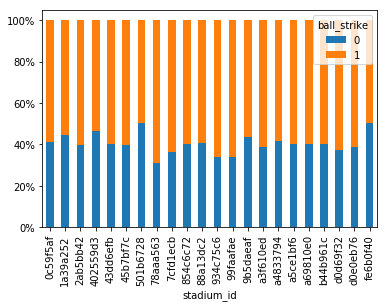

In [190]:
#dfcatch['batter_side'].value_counts().plot(kind='bar')
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


dfcatch.groupby(['stadium_id','ball_strike']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

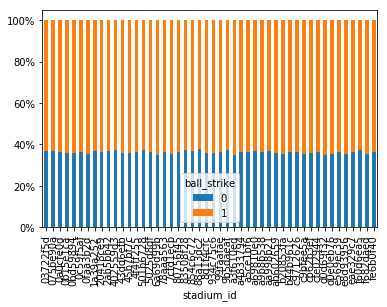

In [191]:
dfcatcho.groupby(['stadium_id','ball_strike']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Actual Balls vs Called Balls

In [211]:
temp = dfcatch[(dfcatch['plate_side'] > .71) | (dfcatch['plate_side'] < -.71)|(dfcatch['plate_height'] > 3.5) | (dfcatch['plate_side'] < 1.5) ]
collections.Counter(temp['pitch_call']).most_common()


[('BallCalled', 3406),
 ('InPlay', 1499),
 ('FoulBall', 1434),
 ('StrikeCalled', 1368),
 ('StrikeSwinging', 964),
 ('HitByPitch', 34)]

In [212]:
temp.shape

(8705, 37)

In [215]:
temp2 = dfcatcho[(dfcatcho['plate_side'] > .71) | (dfcatcho['plate_side'] < -.71)|(dfcatcho['plate_height'] > 3.5) | (dfcatcho['plate_side'] < 1.5) ]
(collections.Counter(temp2['pitch_call']).most_common())

[('BallCalled', 202315),
 ('FoulBall', 99723),
 ('InPlay', 98708),
 ('StrikeCalled', 95192),
 ('StrikeSwinging', 65283),
 ('HitByPitch', 1491),
 ('BallIntentional', 22)]

In [216]:
temp2.shape

(562734, 37)

In [410]:
temp1 = dfcatch[(dfcatch['plate_side'] > .71) | (dfcatch['plate_side'] < -.71)|(dfcatch['plate_height'] > 3.5) | (dfcatch['plate_height'] < 1.5) ]
temp1o = dfcatcho[(dfcatcho['plate_side'] > .71) | (dfcatcho['plate_side'] < -.71)|(dfcatcho['plate_height'] > 3.5) | (dfcatcho['plate_height'] < 1.5) ]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total


pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.621145    0.563336
           FoulBall          0.093612    0.107414
           HitByPitch        0.003304    0.002078
           InPlay            0.084802    0.122139
           StrikeCalled      0.038546    0.044376
           StrikeSwinging    0.158590    0.160656
CU         BallCalled        0.649485    0.624350
           FoulBall          0.072165    0.078749
           HitByPitch        0.001718    0.005226
           InPlay            0.080756    0.068019
           StrikeCalled      0.041237    0.069187
           StrikeSwinging    0.154639    0.154468
FA         BallCalled        0.656619    0.619577
           FoulBall          0.114460    0.118538
           HitByPitch        0.009369    0.005202
           InPlay            0.080244    0.086431
           StrikeCalled      0.085947    0.098806
           StrikeSwinging    0.053360    0.071441
SL         BallCalled        0.596733    0.568092
           FoulBall          0.083405    0.102317
           HitByPitch        0.006019    0.004454
           InPlay            0.064488    0.081268
           StrikeCalled      0.054170    0.064898
           StrikeSwinging    0.195185    0.178959
XX         BallCalled        1.000000    0.680556

## Actual Strikes vs Called Strikes

In [415]:
temp1 = dfcatch[(dfcatch['plate_side'] < .71) & (dfcatch['plate_side'] > -.71) & (dfcatch['plate_height'] <3.5) & (dfcatch['plate_height'] >1.5) ]
temp1o = dfcatcho[(dfcatcho['plate_side'] <.71) & (dfcatcho['plate_side'] > -.71)&(dfcatcho['plate_height'] < 3.5) & (dfcatcho['plate_height'] > 1.5) ]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total


pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.044335    0.026824
           FoulBall          0.233990    0.255961
           InPlay            0.426108    0.344924
           StrikeCalled      0.184729    0.201048
           StrikeSwinging    0.110837    0.171243
CU         BallCalled        0.030120    0.038894
           FoulBall          0.201807    0.205321
           InPlay            0.319277    0.267174
           StrikeCalled      0.334337    0.393130
           StrikeSwinging    0.114458    0.095480
FA         BallCalled        0.045935    0.032845
           FoulBall          0.279743    0.286983
           InPlay            0.289848    0.287395
           StrikeCalled      0.299954    0.289846
           StrikeSwinging    0.084520    0.102923
SL         BallCalled        0.039764    0.029552
           FoulBall          0.232695    0.256268
           InPlay            0.284242    0.303155
           StrikeCalled      0.288660    0.285449
           StrikeSwinging    0.154639    0.125555

## Strikes per zone


### Upper Left

In [417]:
temp1 = dfcatch[(dfcatch['plate_side'] < .71)  & (dfcatch['plate_height'] >2.5) ]
temp1o = dfcatcho[(dfcatcho['plate_side'] <.71) &(dfcatcho['plate_height'] > 2.5) ]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.316279    0.276197
           FoulBall          0.162791    0.191582
           HitByPitch        0.004651    0.001090
           InPlay            0.288372    0.240759
           StrikeCalled      0.181395    0.207502
           StrikeSwinging    0.046512    0.082870
CU         BallCalled        0.206667    0.277163
           FoulBall          0.146667    0.125830
           InPlay            0.160000    0.165412
           StrikeCalled      0.366667    0.396175
           StrikeSwinging    0.120000    0.033826
FA         BallCalled        0.251014    0.266881
           FoulBall          0.249855    0.252725
           HitByPitch        0.002899    0.001874
           InPlay            0.200000    0.188942
           StrikeCalled      0.193043    0.157922
           StrikeSwinging    0.103188    0.131648
SL         BallCalled        0.232446    0.230427
           FoulBall          0.181598    0.212830
           InPlay            0.171913    0.201298
           StrikeCalled      0.300242    0.244710
           StrikeSwinging    0.113801    0.108831
XX         BallCalled        1.000000    0.546875

### Upper Right

In [420]:
temp1 = dfcatch[(dfcatch['plate_side'] >-.71)  & (dfcatch['plate_height'] >2.5) ]
temp1o = dfcatcho[(dfcatcho['plate_side'] >-.71) &(dfcatcho['plate_height'] > 2.5) ]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.396226    0.355920
           FoulBall          0.139623    0.179057
           HitByPitch        0.007547    0.005617
           InPlay            0.237736    0.212938
           StrikeCalled      0.181132    0.173440
           StrikeSwinging    0.037736    0.073027
CU         BallCalled        0.363636    0.350296
           FoulBall          0.126263    0.112200
           InPlay            0.116162    0.145114
           StrikeCalled      0.318182    0.357999
           StrikeSwinging    0.075758    0.030268
FA         BallCalled        0.307732    0.294437
           FoulBall          0.235023    0.244590
           HitByPitch        0.007168    0.004264
           InPlay            0.180236    0.184064
           StrikeCalled      0.174603    0.147199
           StrikeSwinging    0.095238    0.125445
SL         BallCalled        0.228643    0.247713
           FoulBall          0.183417    0.206043
           HitByPitch        0.010050    0.002881
           InPlay            0.170854    0.195419
           StrikeCalled      0.278894    0.245192
           StrikeSwinging    0.128141    0.102752
XX         BallCalled        1.000000    0.587302

### Lower Left

In [421]:
temp1 = dfcatch[(dfcatch['plate_side'] < .71)  & (dfcatch['plate_height'] <2.5) ]
temp1o = dfcatcho[(dfcatcho['plate_side'] < .71) &(dfcatcho['plate_height'] < 2.5) ]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.388122    0.349109
           FoulBall          0.147790    0.158356
           InPlay            0.214088    0.206370
           StrikeCalled      0.066298    0.085695
           StrikeSwinging    0.183702    0.200256
CU         BallCalled        0.392055    0.364019
           FoulBall          0.129534    0.143848
           HitByPitch        0.001727    0.001939
           InPlay            0.200345    0.161495
           StrikeCalled      0.110535    0.151278
           StrikeSwinging    0.165803    0.177420
FA         BallCalled        0.328423    0.300580
           FoulBall          0.180578    0.175538
           HitByPitch        0.002182    0.000404
           InPlay            0.212766    0.212511
           StrikeCalled      0.226405    0.256348
           StrikeSwinging    0.049645    0.054620
SL         BallCalled        0.386301    0.344555
           FoulBall          0.134247    0.157308
           InPlay            0.164384    0.180546
           StrikeCalled      0.106849    0.131295
           StrikeSwinging    0.208219    0.184604

### Lower Right

In [423]:
temp1 = dfcatch[(dfcatch['plate_side'] > -.71)  & (dfcatch['plate_height'] <2.5) ]
temp1o = dfcatcho[(dfcatcho['plate_side'] > -.71) &(dfcatcho['plate_height'] < 2.5) ]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.394969    0.340617
           FoulBall          0.153459    0.168055
           InPlay            0.202516    0.208003
           StrikeCalled      0.067925    0.084840
           StrikeSwinging    0.181132    0.198211
CU         BallCalled        0.321862    0.309318
           FoulBall          0.149798    0.162003
           InPlay            0.228745    0.179217
           StrikeCalled      0.135628    0.177858
           StrikeSwinging    0.163968    0.170120
FA         BallCalled        0.321354    0.267092
           FoulBall          0.182292    0.189687
           InPlay            0.214583    0.223818
           StrikeCalled      0.235937    0.259481
           StrikeSwinging    0.045833    0.059619
SL         BallCalled        0.338362    0.270096
           FoulBall          0.153017    0.184874
           HitByPitch        0.003233    0.001333
           InPlay            0.178879    0.209919
           StrikeCalled      0.117457    0.161487
           StrikeSwinging    0.209052    0.172274

### Upper

In [432]:
temp1 = dfcatch[(dfcatch['plate_height'] >2.5) & (dfcatch['plate_side'] <.71) & (dfcatch['plate_side'] >-.71) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 2.5)  & (dfcatcho['plate_side'] <.71) & (dfcatcho['plate_side'] >-.71)]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.083333    0.103799
           FoulBall          0.212121    0.232756
           InPlay            0.409091    0.301400
           StrikeCalled      0.265152    0.269743
           StrikeSwinging    0.030303    0.092136
CU         BallCalled        0.138462    0.169094
           FoulBall          0.161538    0.143696
           InPlay            0.176923    0.191444
           StrikeCalled      0.415385    0.458743
           StrikeSwinging    0.107692    0.037024
FA         BallCalled        0.170609    0.177492
           FoulBall          0.278136    0.284866
           InPlay            0.221505    0.216355
           StrikeCalled      0.215771    0.172911
           StrikeSwinging    0.113978    0.148334
SL         BallCalled        0.134796    0.139813
           FoulBall          0.203762    0.232714
           InPlay            0.194357    0.227040
           StrikeCalled      0.332288    0.281655
           StrikeSwinging    0.134796    0.118640

### Zone 10 -- Redo

In [607]:
temp3 = dfcatch[(dfcatch['plate_height'] >2.5) & (dfcatch['plate_side'] <-.71) ]
temp2 = dfcatch[(dfcatch['plate_height'] >2.83) & (dfcatch['plate_side'] >-.71)&(dfcatch['plate_side'] < 0) ]
temp3o = dfcatcho[(dfcatcho['plate_height'] > 2.5)  & (dfcatcho['plate_side'] <-.71)]
temp2o = dfcatcho[(dfcatcho['plate_height'] >2.83) & (dfcatcho['plate_side'] >-.71)&(dfcatcho['plate_side'] < 0) ]
temp1 = pd.concat([temp3,temp2])
temp1o = pd.concat([temp3o,temp2o])
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.111111    0.376426
           FoulBall          0.333333    0.266160
           InPlay            0.333333    0.155894
           StrikeCalled      0.222222    0.102662
CU         BallCalled        0.142857    0.548689
           FoulBall          0.142857    0.088015
           InPlay            0.142857    0.097378
           StrikeCalled      0.571429    0.211610
FA         BallCalled        0.441441    0.365288
           FoulBall          0.225225    0.240810
           HitByPitch        0.018018    0.021721
           InPlay            0.162162    0.161028
           StrikeCalled      0.072072    0.092105
           StrikeSwinging    0.081081    0.118839
SL         BallCalled        0.461538    0.459163
           FoulBall          0.192308    0.134462
           InPlay            0.038462    0.097610
           StrikeCalled      0.153846    0.218127
           StrikeSwinging    0.153846    0.070717

### Zone 11

In [638]:
temp3 = dfcatch[(dfcatch['plate_height'] >2.5) & (dfcatch['plate_side'] >.71) ]
temp2 = dfcatch[(dfcatch['plate_height'] >2.83) & (dfcatch['plate_side'] <.71)&(dfcatch['plate_side'] > 0) ]
temp3o = dfcatcho[(dfcatcho['plate_height'] > 2.5)  & (dfcatcho['plate_side'] >.71)]
temp2o = dfcatcho[(dfcatcho['plate_height'] >2.83) & (dfcatcho['plate_side'] <.71)&(dfcatcho['plate_side'] > 0) ]
temp1 = pd.concat([temp3,temp2])
temp1o = pd.concat([temp3o,temp2o])
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total


pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        1.000000    0.321429
CU         BallCalled        0.250000    0.303125
           FoulBall          0.250000    0.106250
           InPlay            0.062500    0.143750
           StrikeCalled      0.312500    0.381250
           StrikeSwinging    0.125000    0.065625
FA         BallCalled        0.489796    0.411283
           FoulBall          0.102041    0.182350
           InPlay            0.091837    0.108614
           StrikeCalled      0.224490    0.175094
           StrikeSwinging    0.091837    0.122659
SL         BallCalled        0.260870    0.352332
           FoulBall          0.086957    0.149396
           InPlay            0.130435    0.169257
           StrikeCalled      0.434783    0.233161
           StrikeSwinging    0.086957    0.095855

### Zone 12

In [627]:
temp3 = dfcatch[(dfcatch['plate_height'] <2.5) & (dfcatch['plate_side'] <-.71) ]
temp2 = dfcatch[(dfcatch['plate_height'] <2.17) & (dfcatch['plate_side'] >-.71)&(dfcatch['plate_side'] < 0) ]
temp3o = dfcatcho[(dfcatcho['plate_height'] < 2.5)  & (dfcatcho['plate_side'] <-.71)]
temp2o = dfcatcho[(dfcatcho['plate_height'] <2.17) & (dfcatcho['plate_side'] >-.71) & (dfcatcho['plate_side'] < 0) ]
temp1 = pd.concat([temp3,temp2])
temp1o = pd.concat([temp3o,temp2o])
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.500000    0.446717
           FoulBall          0.125641    0.123354
           InPlay            0.161538    0.164516
           StrikeCalled      0.035897    0.071684
           StrikeSwinging    0.176923    0.193337
CU         BallCalled        0.518310    0.473254
           FoulBall          0.098592    0.116423
           HitByPitch        0.002817    0.003103
           InPlay            0.152113    0.118696
           StrikeCalled      0.061972    0.093917
           StrikeSwinging    0.166197    0.194607
FA         BallCalled        0.500543    0.459343
           FoulBall          0.144408    0.121525
           HitByPitch        0.004343    0.000773
           InPlay            0.128122    0.146387
           StrikeCalled      0.168295    0.226868
           StrikeSwinging    0.054289    0.045104
SL         BallCalled        0.491329    0.444962
           FoulBall          0.104046    0.122931
           InPlay            0.111272    0.134110
           StrikeCalled      0.078035    0.090017
           StrikeSwinging    0.215318    0.205488

### Zone 13

In [611]:
temp3 = dfcatch[(dfcatch['plate_height'] <2.5) & (dfcatch['plate_side'] >.71) ]
temp2 = dfcatch[(dfcatch['plate_height'] <2.17) & (dfcatch['plate_side'] <.71)&(dfcatch['plate_side'] > 0) ]
temp3o = dfcatcho[(dfcatcho['plate_height'] < 2.5)  & (dfcatcho['plate_side'] >.71)]
temp2o = dfcatcho[(dfcatcho['plate_height'] <2.17) & (dfcatcho['plate_side'] <.71) & (dfcatcho['plate_side'] > 0) ]
temp1 = pd.concat([temp3,temp2])
temp1o = pd.concat([temp3o,temp2o])
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.545455    0.521193
           FoulBall          0.045455    0.109890
           InPlay            0.136364    0.138148
           StrikeCalled      0.136364    0.078493
           StrikeSwinging    0.136364    0.152276
CU         BallCalled        0.671429    0.538124
           FoulBall          0.071429    0.086766
           InPlay            0.100000    0.130149
           StrikeCalled      0.057143    0.070114
           StrikeSwinging    0.100000    0.174847
FA         BallCalled        0.593750    0.523266
           FoulBall          0.072917    0.088006
           InPlay            0.072917    0.099711
           StrikeCalled      0.239583    0.249277
           StrikeSwinging    0.020833    0.039740
SL         BallCalled        0.562500    0.478430
           FoulBall          0.048611    0.099736
           InPlay            0.083333    0.119573
           StrikeCalled      0.055556    0.078929
           StrikeSwinging    0.250000    0.223193

### Zone 1 

In [594]:
#tempa = dfcatch[dfcatch['pitcher_side'] =='Left']
#tempao = dfcatcho[dfcatcho['pitcher_side'] =='Left']

#temp1 = tempa[(tempa['plate_height'] >2.83) &(tempa['plate_height'] <3.5)& (tempa['plate_side'] >-.71)& (tempa['plate_side']<-.47) ]
#temp1o = tempao[(tempao['plate_height'] > 2.83)  & (tempao['plate_height'] <3.5)& (tempao['plate_side'] >-.71)&(tempao['plate_side'] <-.47)]

temp = dfcatch[(dfcatch['plate_height'] >2.83) &(dfcatch['plate_height'] <3.5)& ((dfcatch['plate_side'] >-.71) & (dfcatch['plate_side']<-.47)) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 2.83)  &(dfcatcho['plate_height'] <3.5)&  ((dfcatcho['plate_side'] >-.71) & (dfcatcho['plate_side'] <-.47))]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.035714    0.130435
           FoulBall          0.214286    0.304348
           InPlay            0.357143    0.347826
           StrikeCalled      0.178571    0.217391
CU         FoulBall          0.181818    0.140000
           InPlay            0.363636    0.160000
           StrikeCalled      0.181818    0.600000
           StrikeSwinging    0.272727    0.020000
FA         BallCalled        0.085714    0.089958
           FoulBall          0.142857    0.334728
           InPlay            0.171429    0.240586
           StrikeCalled      0.542857    0.190377
           StrikeSwinging    0.057143    0.144351
SL         BallCalled        0.400000    0.183333
           InPlay            0.400000    0.183333
           StrikeCalled      0.200000    0.375000

### Zone 2 --- Good!

In [640]:
#tempa = dfcatch[dfcatch['batter_side'] =='Right']
#tempao = dfcatcho[dfcatcho['batter_side'] =='Right']

#temp1 = tempa[(tempa['plate_height'] >2.83) &(tempa['plate_height'] <3.5)&(tempa['plate_side'] <.47)& (tempa['plate_side'] >-.47)]
#temp1o = tempao[(tempao['plate_height'] > 2.83)  & (tempao['plate_height'] <3.5)& (tempao['plate_side'] <.47)&(tempao['plate_side'] >-.47)]
temp1 = dfcatch[(dfcatch['plate_height'] >2.83) &(dfcatch['plate_height'] <3.5)&(dfcatch['plate_side'] <.47)& (dfcatch['plate_side'] >-.47)]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 2.83)  & (dfcatcho['plate_height'] <3.5)& (dfcatcho['plate_side'] <.47)&(dfcatcho['plate_side'] >-.47)]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total 



pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall          0.400000    0.289538
           InPlay            0.200000    0.323601
           StrikeCalled      0.200000    0.279805
           StrikeSwinging    0.200000    0.075426
CU         BallCalled        0.117647    0.082061
           FoulBall          0.235294    0.145992
           InPlay            0.058824    0.189885
           StrikeCalled      0.411765    0.541031
           StrikeSwinging    0.176471    0.041031
FA         BallCalled        0.016949    0.038682
           FoulBall          0.279661    0.334874
           InPlay            0.237288    0.249807
           StrikeCalled      0.296610    0.202995
           StrikeSwinging    0.169492    0.173641
SL         BallCalled        0.047619    0.051104
           FoulBall          0.190476    0.233754
           InPlay            0.166667    0.206309
           StrikeCalled      0.523810    0.370662
           StrikeSwinging    0.071429    0.138170

### Zone 3 -- Good!

In [641]:
temp1 = dfcatch[(dfcatch['plate_height'] >2.83) & (dfcatch['plate_height'] <3.5)&(dfcatch['plate_side'] <.71)& (dfcatch['plate_side'] >.47)]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 2.83)  & (dfcatcho['plate_height'] >3.5)&(dfcatcho['plate_side'] <.71)&(dfcatcho['plate_side'] >.47)]
pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
total

pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall          0.333333    0.088889
           InPlay            0.333333    0.066667
           StrikeCalled      0.333333    0.088889
CU         BallCalled        0.111111    0.894366
           FoulBall          0.222222    0.014085
           InPlay            0.222222    0.028169
           StrikeCalled      0.444444    0.056338
FA         BallCalled        0.147059    0.629355
           FoulBall          0.323529    0.133432
           InPlay            0.176471    0.057821
           StrikeCalled      0.176471    0.011861
           StrikeSwinging    0.176471    0.167532
SL         BallCalled        0.111111    0.756458
           FoulBall          0.111111    0.059041
           InPlay            0.111111    0.036900
           StrikeCalled      0.666667    0.047970

In [555]:
def heat(temp1, temp1o):
    pitch_type_ball = temp1.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
    pitch_type = temp1.groupby(['pitch_type']).agg({'pitch_call': 'count'})
    temp = pitch_type_ball.div(pitch_type,level = 'pitch_type')
    pitch_type_ball = temp1o.groupby(['pitch_type','pitch_call']).agg({'pitch_call':'count'})
    pitch_type= temp1o.groupby(['pitch_type']).agg({'pitch_call': 'count'})
    tempo = pitch_type_ball.div(pitch_type,level = 'pitch_type')
    total = pd.concat([temp, tempo], axis=1, sort=False).dropna()
    print (total)
heat (temp1,temp1o)

                           pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall          0.333333    0.088889
           InPlay            0.333333    0.066667
           StrikeCalled      0.333333    0.088889
CU         BallCalled        0.111111    0.894366
           FoulBall          0.222222    0.014085
           InPlay            0.222222    0.028169
           StrikeCalled      0.444444    0.056338
FA         BallCalled        0.147059    0.629355
           FoulBall          0.323529    0.133432
           InPlay            0.176471    0.057821
           StrikeCalled      0.176471    0.011861
           StrikeSwinging    0.176471    0.167532
SL         BallCalled        0.111111    0.756458
           FoulBall          0.111111    0.059041
           InPlay            0.111111    0.036900
           StrikeCalled      0.666667    0.047970


### Zone 4

In [597]:
temp1 = dfcatch[(dfcatch['plate_height'] <2.83) & (dfcatch['plate_height'] >2.17)& (dfcatch['plate_side'] >-.71) & (dfcatch['plate_side'] <-.47) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] <2.83) & (dfcatcho['plate_height'] >2.17)& (dfcatcho['plate_side'] >-.71) & (dfcatcho['plate_side'] <-.47) ]
heat (temp1,temp1o)

                         pitch_call  pitch_call
pitch_type pitch_call                          
CH         FoulBall        1.000000    0.520000
FA         FoulBall        0.222222    0.343152
           InPlay          0.666667    0.396171
           StrikeCalled    0.111111    0.184094
SL         InPlay          0.333333    0.174419
           StrikeCalled    0.666667    0.552326


### ZONE 5

In [598]:
temp1 = dfcatch[(dfcatch['plate_height'] <2.83) & (dfcatch['plate_height'] >2.17)& (dfcatch['plate_side'] <.47) & (dfcatch['plate_side'] >-.47) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] <2.83) & (dfcatcho['plate_height'] >2.17)& (dfcatcho['plate_side'] <.47) & (dfcatcho['plate_side'] >-.47)]
heat (temp1,temp1o)                                                                                                                       

                           pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall          0.375000    0.305556
           InPlay            0.250000    0.416667
           StrikeCalled      0.375000    0.172222
CU         FoulBall          0.200000    0.203091
           InPlay            0.333333    0.364238
           StrikeCalled      0.400000    0.350993
           StrikeSwinging    0.066667    0.081678
FA         FoulBall          0.293103    0.318257
           InPlay            0.293103    0.314120
           StrikeCalled      0.327586    0.271098
           StrikeSwinging    0.086207    0.096525
SL         FoulBall          0.322581    0.266525
           InPlay            0.258065    0.363184
           StrikeCalled      0.258065    0.264392
           StrikeSwinging    0.161290    0.105899


### ZONE 6

In [642]:
temp1 = dfcatch[(dfcatch['plate_height'] <2.83) & (dfcatch['plate_height'] >2.17)& (dfcatch['plate_side'] >.47) & (dfcatch['plate_side'] <.71) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] <2.83) & (dfcatcho['plate_height'] >2.17)& (dfcatcho['plate_side'] >.47) & (dfcatcho['plate_side'] <.71)]
heat (temp1,temp1o)                                                                                                                       

                           pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall          0.200000    0.476331
           InPlay            0.800000    0.298817
CU         InPlay            0.750000    0.236364
           StrikeCalled      0.250000    0.511688
FA         FoulBall          0.314815    0.331697
           InPlay            0.425926    0.398668
           StrikeCalled      0.222222    0.209677
           StrikeSwinging    0.037037    0.055049
SL         FoulBall          0.076923    0.233333
           InPlay            0.461538    0.243590
           StrikeCalled      0.461538    0.466667


### ZONE 7

In [600]:
temp1 = dfcatch[(dfcatch['plate_height'] >1.5) &(dfcatch['plate_height'] <2.17)& ((dfcatch['plate_side'] >-.71) & (dfcatch['plate_side']<-.47)) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 1.5)  &(dfcatcho['plate_height'] <2.17)&  ((dfcatcho['plate_side'] >-.71) & (dfcatcho['plate_side'] <-.47))]
heat(temp1,temp1o)

                           pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall              1.00    0.376623
CU         InPlay                1.00    0.145161
FA         FoulBall              0.25    0.269874
           StrikeCalled          0.25    0.288703
           StrikeSwinging        0.50    0.083682
SL         BallCalled            1.00    0.110092


### Zone 8

In [601]:
temp1 = dfcatch[(dfcatch['plate_height'] >1.5) &(dfcatch['plate_height'] <2.17)& ((dfcatch['plate_side']<.47) & (dfcatch['plate_side']>-.47)) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 1.5)  &(dfcatcho['plate_height'] <2.17)&  ((dfcatcho['plate_side'] <.47) & (dfcatcho['plate_side'] >-.47))]
heat(temp1,temp1o)

                           pitch_call  pitch_call
pitch_type pitch_call                            
CH         BallCalled        0.166667    0.014388
           FoulBall          0.333333    0.287770
           InPlay            0.333333    0.302158
           StrikeCalled      0.166667    0.151079
CU         BallCalled        0.125000    0.033582
           FoulBall          0.250000    0.225746
           InPlay            0.375000    0.343284
           StrikeCalled      0.250000    0.251866
FA         BallCalled        0.097561    0.043541
           FoulBall          0.243902    0.204644
           InPlay            0.219512    0.292090
           StrikeCalled      0.365854    0.394775
           StrikeSwinging    0.073171    0.064949
SL         FoulBall          0.222222    0.222783
           InPlay            0.388889    0.317231
           StrikeCalled      0.277778    0.256669
           StrikeSwinging    0.111111    0.178082


### Zone 9

In [643]:
temp1 = dfcatch[(dfcatch['plate_height'] >1.5) &(dfcatch['plate_height'] <2.17)& ((dfcatch['plate_side'] >.47) & (dfcatch['plate_side']<.71)) ]
temp1o = dfcatcho[(dfcatcho['plate_height'] > 1.5)  &(dfcatcho['plate_height'] <2.17)&  ((dfcatcho['plate_side'] >.47) & (dfcatcho['plate_side'] <.71))]
heat(temp1,temp1o)

                           pitch_call  pitch_call
pitch_type pitch_call                            
CH         FoulBall          0.250000    0.423404
           InPlay            0.250000    0.197872
           StrikeSwinging    0.500000    0.257447
CU         FoulBall          0.666667    0.306723
           StrikeSwinging    0.333333    0.079832
FA         BallCalled        0.043478    0.061328
           FoulBall          0.173913    0.282311
           InPlay            0.391304    0.312215
           StrikeCalled      0.391304    0.279777
SL         BallCalled        0.166667    0.084314
           FoulBall          0.166667    0.192157
           InPlay            0.166667    0.194118
           StrikeCalled      0.500000    0.466667


### Right hand batter, right hand pitcher

In [639]:
dfcatch = df[df['catcher_id'] =='f06c9fdf']
dfcatcho = df[df['catcher_id'] !='f06c9fdf']
dfcatch = dfcatch[(dfcatch['batter_side'] =='Right') & (dfcatch['pitcher_side']=='Right')]
dfcatcho= dfcatcho[(dfcatcho['batter_side'] =='Right') & (dfcatcho['pitcher_side']=='Right')]

In [616]:
dfcatcho.count()

pitcher_id             211772
pitcher_side           211772
batter_id              211772
batter_side            211772
stadium_id             211772
umpire_id              211772
catcher_id             211772
inning                 211772
top_bottom             211772
outs                   211772
balls                  211772
strikes                211772
release_speed          211772
vert_release_angle     211772
horz_release_angle     211772
spin_rate              211772
spin_axis              211772
tilt                   211772
rel_height             211772
rel_side               211772
extension              211772
vert_break             211772
induced_vert_break     211772
horz_break             211772
plate_height           211772
plate_side             211772
zone_speed             211772
vert_approach_angle    211772
horz_approach_angle    211772
zone_time              211772
x55                    211772
y55                    211772
z55                    211772
pitch_type

### Right hand pitcher, left hand batter

In [633]:
dfcatch = df[df['catcher_id'] =='f06c9fdf']
dfcatcho = df[df['catcher_id'] !='f06c9fdf']
dfcatch = dfcatch[(dfcatch['batter_side'] =='Right') & (dfcatch['pitcher_side']=='Left')]
dfcatcho= dfcatcho[(dfcatcho['batter_side'] =='Right') & (dfcatcho['pitcher_side']=='Left')]

In [620]:
dfcatcho.count()

pitcher_id             117372
pitcher_side           117372
batter_id              117372
batter_side            117372
stadium_id             117372
umpire_id              117372
catcher_id             117372
inning                 117372
top_bottom             117372
outs                   117372
balls                  117372
strikes                117372
release_speed          117372
vert_release_angle     117372
horz_release_angle     117372
spin_rate              117372
spin_axis              117372
tilt                   117372
rel_height             117372
rel_side               117372
extension              117372
vert_break             117372
induced_vert_break     117372
horz_break             117372
plate_height           117372
plate_side             117372
zone_speed             117372
vert_approach_angle    117372
horz_approach_angle    117372
zone_time              117372
x55                    117372
y55                    117372
z55                    117372
pitch_type

### Left hand pitcher, right hand batter

In [635]:
dfcatch = df[df['catcher_id'] =='f06c9fdf']
dfcatcho = df[df['catcher_id'] !='f06c9fdf']
dfcatch = dfcatch[(dfcatch['batter_side'] =='Left') & (dfcatch['pitcher_side']=='Right')]
dfcatcho= dfcatcho[(dfcatcho['batter_side'] =='Left') & (dfcatcho['pitcher_side']=='Right')]

In [622]:
dfcatcho.count()

pitcher_id             189307
pitcher_side           189307
batter_id              189307
batter_side            189307
stadium_id             189307
umpire_id              189307
catcher_id             189307
inning                 189307
top_bottom             189307
outs                   189307
balls                  189307
strikes                189307
release_speed          189307
vert_release_angle     189307
horz_release_angle     189307
spin_rate              189307
spin_axis              189307
tilt                   189307
rel_height             189307
rel_side               189307
extension              189307
vert_break             189307
induced_vert_break     189307
horz_break             189307
plate_height           189307
plate_side             189307
zone_speed             189307
vert_approach_angle    189307
horz_approach_angle    189307
zone_time              189307
x55                    189307
y55                    189307
z55                    189307
pitch_type

### Left hand pitcher, left hand batter

In [637]:
dfcatch = df[df['catcher_id'] =='f06c9fdf']
dfcatcho = df[df['catcher_id'] !='f06c9fdf']
#dfcatch = dfcatch[(dfcatch['batter_side'] =='Left') & (dfcatch['pitcher_side']=='Left')]
#dfcatcho= dfcatcho[(dfcatcho['batter_side'] =='Left') & (dfcatcho['pitcher_side']=='Left')]

In [624]:
dfcatcho.count()

pitcher_id             44283
pitcher_side           44283
batter_id              44283
batter_side            44283
stadium_id             44283
umpire_id              44283
catcher_id             44283
inning                 44283
top_bottom             44283
outs                   44283
balls                  44283
strikes                44283
release_speed          44283
vert_release_angle     44283
horz_release_angle     44283
spin_rate              44283
spin_axis              44283
tilt                   44283
rel_height             44283
rel_side               44283
extension              44283
vert_break             44283
induced_vert_break     44283
horz_break             44283
plate_height           44283
plate_side             44283
zone_speed             44283
vert_approach_angle    44283
horz_approach_angle    44283
zone_time              44283
x55                    44283
y55                    44283
z55                    44283
pitch_type             44283
pitch_call    

## Foul Balls

In [471]:
(3.5-2*.666666666)

2.166666668

In [258]:
dfcatch[(dfcatch['strikes'] == 2)].groupby('pitch_call').count()/dfcatch[(dfcatch['strikes'] == 2)].shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_id,ball_strike
pitch_call,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BallCalled,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421,36.968421
FoulBall,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000,20.800000
HitByPitch,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789,0.715789
InPlay,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632,22.652632
StrikeCalled,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684,3.873684
StrikeSwinging,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474,14.989474


In [259]:
dfcatcho[(dfcatcho['strikes'] == 2)].groupby('pitch_call').count()/dfcatcho[(dfcatcho['strikes'] == 2)].shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_id,ball_strike
pitch_call,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BallCalled,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076,34.377076
BallIntentional,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609
FoulBall,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605,23.199605
HitByPitch,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780,0.360780
InPlay,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961,22.588961
StrikeCalled,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408,4.552408
StrikeSwinging,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561,14.920561


## Offense

In [15]:
collections.Counter(dfbat['batter_side']).most_common()

[('Left', 1045)]

In [20]:
#collections.Counter(dfcatch['pitcher_id']).most_common()
collections.Counter(dfbat['pitcher_id']).most_common()

[('26909605', 41),
 ('ba4366d6', 38),
 ('3a51f707', 26),
 ('4881cbf1', 22),
 ('559159e8', 21),
 ('e53c34f5', 18),
 ('b3d5c0a9', 17),
 ('5d8108e6', 17),
 ('d735c8a7', 16),
 ('a2f05755', 16),
 ('70c1ef0f', 16),
 ('4c807a49', 15),
 ('d81c91d8', 15),
 ('68f63e9b', 14),
 ('42bf9b53', 14),
 ('18908cee', 14),
 ('b3796b3a', 13),
 ('f7d8d26c', 13),
 ('9bccdcdc', 13),
 ('ccc2de06', 13),
 ('30e3a7cd', 13),
 ('e3428ee9', 12),
 ('13b6b4ac', 11),
 ('f3cadfb7', 11),
 ('734b5e6a', 10),
 ('cf61ef50', 10),
 ('84d4e820', 10),
 ('95213593', 10),
 ('a7d6c668', 10),
 ('d2c542c4', 10),
 ('495be666', 10),
 ('f0d85178', 10),
 ('3903adfd', 10),
 ('be5181f0', 10),
 ('066e327d', 10),
 ('2296697e', 9),
 ('2b7af301', 9),
 ('79dbdcd2', 9),
 ('87f07a75', 9),
 ('94a20652', 9),
 ('e56ef42f', 9),
 ('0bf5d3c5', 9),
 ('e2b03c9f', 9),
 ('ae87a7a4', 8),
 ('f92416e4', 8),
 ('b0c2792c', 8),
 ('42e43a99', 8),
 ('47032f76', 8),
 ('afae9816', 8),
 ('0af30416', 8),
 ('0010affe', 8),
 ('fb6aff9c', 8),
 ('22c6ec65', 7),
 ('f56ccf9b

In [116]:
print(dfbat.shape, dfbato.shape)

(1045, 37) (570394, 37)


In [29]:
dfbat['pitcher_id'].nunique()

145 154


In [140]:
dfbat.describe()

,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,ball_strike
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.0,1045.000000,1045.000000
mean,5.570335,1.492823,1.121531,0.965550,0.933014,89.134966,-1.448117,-1.494295,2204.099125,190.808027,5.836687,1.236811,6.138170,-26.396145,9.016745,4.585877,2.248290,0.219706,81.565980,-6.400408,-0.624270,0.426651,-1.252054,55.0,5.859895,0.612440
std,2.685651,0.500188,0.824415,1.016511,0.826588,5.597449,1.401216,2.542695,317.159924,66.971263,0.548866,1.791074,0.463713,13.239144,8.812987,10.308678,0.898351,0.817096,5.033554,1.886901,1.998033,0.030298,1.821711,0.0,0.557844,0.487426
min,1.000000,1.000000,0.000000,0.000000,0.000000,71.331100,-5.366630,-6.968960,663.572021,9.240080,2.438870,-4.588580,4.582620,-73.514198,-18.585800,-25.521799,-1.372440,-2.357030,64.627998,-14.204700,-6.569470,0.381038,-4.488580,55.0,2.362030,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,85.647102,-2.404740,-3.154400,2058.300049,155.141006,5.557130,1.063290,5.828760,-33.776199,3.748550,-3.628560,1.690400,-0.322005,78.562401,-7.506940,-1.940350,0.404107,-2.341810,55.0,5.581220,0.000000
50%,6.000000,1.000000,1.000000,1.000000,1.000000,90.456802,-1.567960,-2.206910,2224.100098,208.201996,5.882030,1.770450,6.150450,-22.524099,11.044300,7.233720,2.281080,0.218565,82.866997,-6.088610,-0.777090,0.417438,-1.803150,55.0,5.906790,1.000000
75%,8.000000,2.000000,2.000000,2.000000,2.000000,93.567596,-0.691037,-0.648538,2396.830078,233.761002,6.190300,2.310800,6.442570,-16.010099,15.965500,13.167900,2.803760,0.768326,85.334396,-5.069120,0.422351,0.442360,-1.078940,55.0,6.222670,1.000000
max,13.000000,2.000000,2.000000,3.000000,2.000000,98.396797,3.974150,6.754100,3296.379883,358.225006,7.039350,4.323570,7.414770,-8.408630,23.455900,22.745899,5.570650,2.697780,90.807404,-1.741600,7.332120,0.542034,4.667270,55.0,7.073060,1.000000


In [115]:
dfbat = df[df['batter_id'] =='f06c9fdf']
dfbato = df[df['batter_id'] !='f06c9fdf']

In [141]:
dfbato.describe()

,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,ball_strike
count,570394.000000,570394.000000,570394.000000,570394.00000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.000000,570394.0,570394.000000,570394.000000
mean,5.012292,1.490631,0.982393,0.88613,0.889436,88.830238,-1.523314,-1.009892,2220.448512,181.436367,5.919975,0.753236,6.100220,-26.538057,9.208181,2.030108,2.252176,-0.033781,81.343943,-6.494958,-0.621703,0.429295,-0.759217,55.0,5.944083,0.637333
std,2.680525,0.499913,0.817246,0.96795,0.825158,5.901908,1.458166,2.763712,311.954997,65.825664,0.518735,1.988283,0.493123,13.493314,8.861882,10.510632,0.946884,0.863280,5.271846,1.891458,2.226325,0.032159,2.012755,0.0,0.523991,0.480770
min,1.000000,1.000000,0.000000,0.00000,0.000000,41.396500,-10.605200,-9.101000,362.382996,0.037000,1.005030,-5.518970,1.612180,-171.931000,-68.846298,-32.847698,-3.510870,-6.803380,38.572899,-17.125799,-11.180300,0.355875,-5.072390,55.0,1.076910,0.000000
25%,3.000000,1.000000,0.000000,0.00000,0.000000,84.727997,-2.511690,-3.054897,2072.729980,140.371994,5.664510,-1.253540,5.782640,-34.027575,4.290855,-6.518567,1.645833,-0.626164,77.880096,-7.654305,-2.181460,0.405314,-2.219870,55.0,5.687310,0.000000
50%,5.000000,1.000000,1.000000,1.00000,1.000000,90.143749,-1.668785,-1.895910,2238.255005,195.761002,5.958690,1.548980,6.106600,-22.878200,11.178650,3.306490,2.258300,-0.038193,82.493896,-6.242145,-0.749107,0.420592,-1.564520,55.0,5.984400,1.000000
75%,7.000000,2.000000,2.000000,2.00000,2.000000,93.348396,-0.703953,1.331257,2400.517517,225.072006,6.243110,2.197888,6.424930,-15.825500,16.205000,11.106200,2.867625,0.556811,85.289703,-5.132783,0.791213,0.448411,1.273515,55.0,6.268850,1.000000
max,18.000000,2.000000,2.000000,3.00000,2.000000,105.052002,15.231100,9.358300,3752.239990,359.984009,8.750060,4.984060,10.070200,97.565002,132.962006,51.857899,18.021900,12.040800,96.798401,16.200701,9.884520,1.008390,5.582150,55.0,9.209940,1.000000


In [151]:
print(collections.Counter(dfbat['pitch_type']).most_common())
print(collections.Counter(dfbato['pitch_type']).most_common())

[('FA', 627), ('SL', 173), ('CH', 134), ('CU', 111)]
[('FA', 317098), ('SL', 125568), ('CH', 68552), ('CU', 58993), ('XX', 179), ('KN', 4)]


In [152]:
dfbat.groupby('pitch_type').count()/1045*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_call,pitch_id,ball_strike
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967,12.822967
CU,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010,10.622010
FA,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
SL,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024,16.555024


In [153]:
print(collections.Counter(dfbat['pitch_call']).most_common())

[('BallCalled', 403), ('StrikeCalled', 199), ('FoulBall', 185), ('InPlay', 181), ('StrikeSwinging', 75), ('HitByPitch', 2)]


In [148]:
#dfbat.groupby('pitch_call').count()/dfbat.shape[0]*100
dfbat.groupby('ball_strike').count()/dfbat.shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
ball_strike,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981,38.755981
1,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019,61.244019


In [155]:
dfbato.groupby('pitch_type').count()/570394*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_call,pitch_id,ball_strike
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359,12.018359
CU,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500,10.342500
FA,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801,55.592801
KN,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701,0.000701
SL,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257,22.014257
XX,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382,0.031382


In [163]:
dfbato.groupby('ball_strike').count()/dfbato.shape[0]*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
ball_strike,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686,36.266686
1,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314,63.733314


In [178]:
dfbat[dfbat['pitch_type'] =='FA'].groupby('ball_strike').count()/627*100
#dfbat[dfbat['pitch_type'] =='SL'].groupby('ball_strike').count()/173*100



#[(dfbat['pitch_type'] =='FA')|(dfbat['pitch_type'] =='SL')].groupby('ball_strike').count()/(627+173)*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
ball_strike,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
1,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0


In [180]:
dfbato[dfbato['pitch_type'] =='FA'].groupby('ball_strike').count()/317098*100
#dfbato[dfbato['pitch_type'] =='SL'].groupby('ball_strike').count()/125568*100

#dfbato[(dfbato['pitch_type'] =='FA')|(dfbato['pitch_type'] =='SL')].groupby('ball_strike').count()/(317098+125568)*100

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,tilt,rel_height,rel_side,extension,vert_break,induced_vert_break,horz_break,plate_height,plate_side,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
ball_strike,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361,34.974361
1,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639,65.025639


In [ ]:
## Summary: 
### Offense (Strength):  Get more balls than average catcher on fastballs, which he gets 60% of the time compared
### to other catchers who get them 55% of the time.
### Defense (Weakness): Gets more balls called on fastballs than average catcher.
## experienced, lots of balls caught, lots of stadiums, lots of umpires, lots of pitchers
### Foul balls with two strikes are generally considered positive for the batter, 
### since he thus avoids strike three on a potentially difficult pitch. Also, foul balls 
### with two strikes increase the pitcher's pitch count, 
### adding to his/her fatigue, thus providing some small advantage to the offense.
### Ervin Santana, starter:

“Foul balls? It depends on who is hitting it. If it’s a righty and they hit it to right field, it means he’s late on the fastball. So it depends.

“Sometimes there’s a good battle where they foul the ball off — foul, foul, foul, foul, foul — and then they see every pitch you throw. Sometimes it works in their favor, sometimes it works in my favor. It’s a bit difficult to describe it.

“(If I have a lot of foul balls at the end of a start), I’m going to be out early. That’s not good.”

Kohl Stewart, starter:

“It means that it’s at least a strike, which gets me ahead. It normally tells me if a hitter is behind or if he’s way out in front, which will help me determine the next pitch I’m probably going to throw.